In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
import time
import matplotlib.pyplot as plt

In [2]:
def int1(x, a):
    return np.exp(-((x - a)** 2)/(4 * a)) * np.tanh(x/2)

In [3]:
def f_1(v_1, dc):
    return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)

In [4]:
def int2(x, a):
    return np.exp(-(x - a)** 2/(4 * a)) * (np.tanh(x/2)) ** 3

In [5]:
def f_2(v_2, dc):
    return (1/(4 * np.pi * v_2) ** (1/2) * quad(int2, -np.inf, np.inf, args = (v_2))[0]) ** (dc - 1)

In [6]:
def int3(x, a):
    return np.exp(-(x - a)** 2/(4 * a)) * (np.tanh(x/2)) ** 5

In [7]:
def f_3(v_3, dc):
    return (1/(4 * np.pi * v_3) ** (1/2) * quad(int3, -np.inf, np.inf, args = (v_3))[0]) ** (dc - 1)

In [8]:
def int4(x, a):
    return np.exp(-(x - a)** 2/(4 * a)) * np.log(np.tanh(np.abs(x) / 2))

In [9]:
def f_4(v_3, dc):
    return (1/(4 * np.pi * v_3) ** (1/2) * quad(int4, -np.inf, np.inf, args = (v_3))[0]) * (dc - 1)

In [11]:
def f123(vars, dc = 3):
    a, b, c = vars
    f_1_ = a * (f_1(b, dc)) + (1 - a) * (f_1(c, dc))
    f_2_ = a * (f_2(b, dc)) + (1 - a) * (f_2(c, dc))
    f_3_ = a * (f_3(b, dc)) + (1 - a) * (f_3(c, dc))
    return [f_1_, f_2_, f_3_]


def const_gen(mu):
    return [f_1(mu, dc), f_2(mu, dc), f_3(mu, dc)]


dc = 3
def solver(eq, dc, mu):
    num = const_gen(mu)
    
    solution = fsolve(eq, num)
    return solution
solution = solver(f123, dc, 2)
solution

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_45841/1322020369.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_45841/1837958142.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-((x - a)** 2)/(4 * a)) * np.tanh(x/2)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_45841/1322020369.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  wa

array([ 0.3029407 ,  0.1741863 , -1.15547919])

In [12]:
mu = np.arange(1, 100, 0.1)
ans = np.zeros(shape = (mu.size, 3))
mse = np.zeros(mu.size)

In [32]:
dc = 3
for i in range(len(mu)):
    ans[i] = solver(f123, dc, mu[i])
    res = np.array([f_1(ans[i][0], dc), f_2(ans[i][2], dc), f_3(ans[i][2], dc)])
    mse[i] = np.linalg.norm(res - const_gen(mu[i]), 2)

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_45841/1322020369.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_45841/1837958142.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-((x - a)** 2)/(4 * a)) * np.tanh(x/2)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_45841/1322020369.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return (((1/((4 * np.pi * v_1) ** (1/2))) * quad(int1, -np.inf, np.inf, args = (v_1))[0])) ** (dc - 1)
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_45841/3057345761.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advi

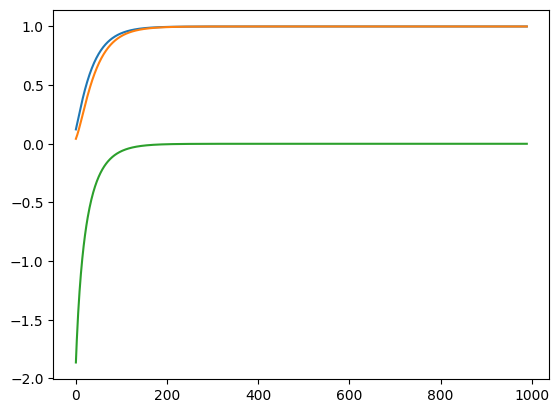

In [41]:
for i in range(3):
    plt.plot(ans[:, i])

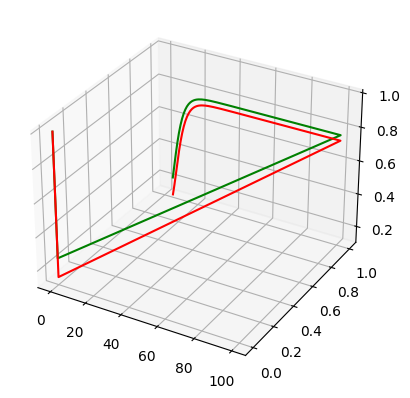

In [29]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ='3d')

dc = 9
a = 0.3
x = np.linspace(5, 100, 100)
y = np.linspace(5, 100, 100)
fin = np.zeros(shape = (10000, 2))
count = 0
z_1 = np.zeros(10000)
z_2 = np.zeros(10000)
for i in range(len(x)):
    for j in range(len(y)):
        fin[i] = [x[i], y[j] / 100]
        z_1[count] = a * (f_1(x[i], dc)) + (1 - a) * (f_1(y[j], dc))
        z_2[count] = a * (f_2(x[i], dc)) + (1 - a) * (f_2(y[j], dc))
        count += 1
ax.plot3D(fin[:, 0], fin[:, 1], z_1, 'green')
ax.plot3D(fin[:, 0], fin[:, 1], z_2, 'red')

plt.show()